In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

## Original Warm Year (2019)

In [3]:

#years, months, data
monthly_array_temp_orig_slice = np.zeros([14,12,50,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2019, 2021), ['votemper']

# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### Original 2019     

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

In [4]:
monthly_array_temp_orig_slice[monthly_array_temp_orig_slice == 0 ] = np.nan
monthly_array_temp_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_orig_slicemean))

(14, 12)


/tmp/ipykernel_1371623/1734163470.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_orig_slice, axis = 2),axis = 2)


In [5]:
monthly_array_temp_orig_slicemean

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,  

## Full Year Switch (2008 winds applied to 2019)

In [6]:

#years, months, data
monthly_array_temp_full_slice = np.zeros([14,12,50,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2019, 2021), ['votemper']



# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}


        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_full_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_W08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_full_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]




In [7]:
monthly_array_temp_full_slice[monthly_array_temp_full_slice == 0 ] = np.nan
monthly_array_temp_full_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_full_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_full_slicemean))

(14, 12)


/tmp/ipykernel_1371623/2142003998.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_full_slice, axis = 2),axis = 2)


In [8]:
monthly_array_temp_full_slicemean

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,  

## Spring wind switch (2019 with 2008 spring winds)

In [9]:

#years, months, data
monthly_array_temp_spring_slice = np.zeros([14,12,50,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2019, 2021), ['votemper']


# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

        
# Add experiment year; Keep winds the same for January and February
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 3):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
      
        
     # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

# Change winds for spring (March to May)
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(3, 6):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01mar19_wind08_spring/SalishSea_1m_{datestr}_{datestr}'
      
        
      # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                

# Winds for rest of the year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(6, 9):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jun19_wind08_spring/SalishSea_1m_{datestr}_{datestr}'
      
        
       # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_spring_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)        

        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [10]:
monthly_array_temp_spring_slice[monthly_array_temp_spring_slice == 0 ] = np.nan
monthly_array_temp_spring_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_spring_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_spring_slicemean))

(14, 12)


/tmp/ipykernel_1371623/2151430389.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_spring_slice, axis = 2),axis = 2)


## Summer Wind Switch (2008 with 2019 summer winds)

In [11]:
#years, months, data
monthly_array_temp_summer_slice = np.zeros([14,12,50,50])

# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask,depth = [mask[var].isel(**slc).values for var in ('e3t_0', 'tmask','gdept_0')]
years, variables = range(2019, 2021), ['votemper']


# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}



        
# Add experiment year; Keep winds the same for January and May
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 6):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
      # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)            

# Change winds for Summer (June to August)
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(6, 9):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jun19_wind08_summer/SalishSea_1m_{datestr}_{datestr}'
      
      
        
     # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)                 

# 
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(9, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01sep19_wind08_summer/SalishSea_1m_{datestr}_{datestr}'
      
      
        
     # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)  
        
# 
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(10, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01oct19_wind08_summer/SalishSea_1m_{datestr}_{datestr}'
      
      
        
     # Load grazing variables
        with xr.open_dataset(prefix + '_grid_T.nc') as ds:
            q = ds.votemper.isel(deptht=0, **slc).values
            q2 = q[0,:,:]
            monthly_array_temp_summer_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['votemper']:
                data[var].append(ds.votemper.isel(deptht=0, **slc).values)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)     
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]

In [12]:
monthly_array_temp_summer_slice[monthly_array_temp_summer_slice == 0 ] = np.nan
monthly_array_temp_summer_slicemean = \
np.nanmean(np.nanmean(monthly_array_temp_summer_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_temp_summer_slicemean))

(14, 12)


/tmp/ipykernel_1371623/994700041.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_temp_summer_slice, axis = 2),axis = 2)


Text(0, 0.5, 'Degrees C')

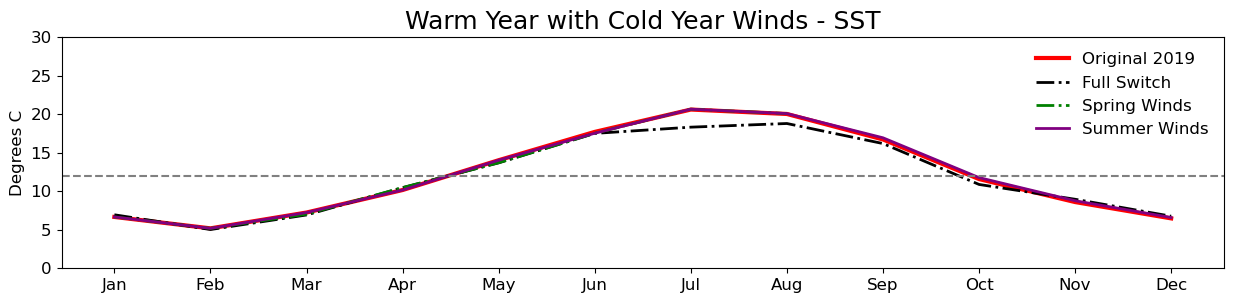

In [16]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_temp_orig_slicemean[12,:],color='r',linestyle='-',linewidth=3,label='Original 2019')
ax.plot(xticks, monthly_array_temp_full_slicemean[12,:],color='k',linestyle='-.',linewidth=2,label='Full Switch')
ax.plot(xticks, monthly_array_temp_spring_slicemean[12,:],color='green',linestyle='-.',linewidth=2,label='Spring Winds')
ax.plot(xticks, monthly_array_temp_summer_slicemean[12,:],color='purple',linestyle='-',linewidth=2,label='Summer Winds')
plt.axhline(y=12, color='grey', linestyle='--')
#plt.axvline(x=4, color='grey', linestyle='--')

ax.set_title('Warm Year with Cold Year Winds - SST',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,30)
ax.set_ylabel('Degrees C')

In [21]:
monthly_array_temp_orig_slicemean[12] ## original warm year

array([ 6.66574269,  5.18524643,  7.24007046, 10.16174981, 14.03568474,
       17.7114818 , 20.61275981, 20.03991294, 16.73050814, 11.58581398,
        8.60023705,  6.47922814])

In [20]:
monthly_array_temp_summer_slicemean[12] ## warm year with cold year SUMMER winds

array([ 6.66574269,  5.18524643,  7.24007046, 10.16174981, 14.03568474,
       17.53400084, 20.6612891 , 20.0909152 , 16.9468314 , 11.77644792,
        8.76992228,  6.589835  ])